In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


### Reading Training data

In [2]:
df1=pd.read_csv("./processed/training/engaged.csv")
df2=pd.read_csv("./processed/training/notEngaged.csv")
dff=pd.read_csv("./TopFeatures.csv")

In [3]:
dft=pd.concat([df1,df2])

In [4]:
feat=dff.to_numpy()
feat=feat.reshape(-1)

In [5]:
print(feat)

[' AU12_c' ' AU04_c' ' AU12_r' ' AU04_r' ' AU05_c' ' AU14_c' ' AU06_c'
 ' AU06_r' ' AU14_r' ' AU07_r' ' p_8' ' AU10_c' ' p_2' ' AU10_r' ' p_0'
 ' p_23' ' p_7' ' p_6' ' p_10' ' AU01_r' ' AU25_r' ' p_24' ' p_12' ' p_11'
 ' AU17_r' ' AU09_r' ' AU26_r' ' p_9' ' AU45_r' ' p_20' ' AU05_r'
 ' AU23_r' ' p_13' ' p_19' ' p_33' ' gaze_angle_y' ' p_5' ' AU02_r'
 ' p_26' ' p_18' ' p_16' ' gaze_1_y' ' p_32' ' AU07_c' ' AU15_c' ' AU15_r'
 ' p_30' ' p_31' ' AU20_r' ' p_4']


In [6]:
y_train=dft["Result"]
x_train=dft.drop("Result",axis=1)
x_train=x_train[feat]

In [7]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



### Initialize model with optimum parameters

In [8]:
model = RandomForestClassifier(max_depth=5,criterion='gini')

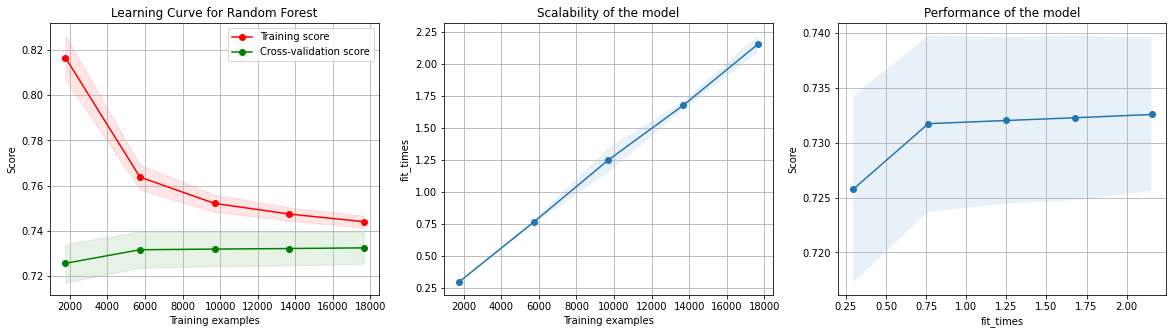

In [9]:
#fig, axes = plt.subplots(3, 1, figsize=(10, 15))


# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


title = "Learning Curve for Random Forest"
estimator = model
plot_learning_curve(estimator, title, x_train, y_train,
                    cv=cv, n_jobs=4)
plt.show()
plt.close()
    

### Score of the model with 100 folds

In [10]:
avg_score=cross_val_score(model,x_train, y_train, cv=100)

In [11]:
print(avg_score)
print(sum(avg_score)/100)

[0.78280543 0.74660633 0.75113122 0.7918552  0.77828054 0.68778281
 0.760181   0.82352941 0.7918552  0.7918552  0.69683258 0.76470588
 0.760181   0.78733032 0.75565611 0.75565611 0.8280543  0.85067873
 0.84615385 0.8280543  0.73303167 0.76923077 0.73303167 0.63348416
 0.73755656 0.50678733 0.58823529 0.60633484 0.57013575 0.63348416
 0.59728507 0.57918552 0.62895928 0.58371041 0.60633484 0.6199095
 0.56108597 0.63800905 0.65158371 0.5158371  0.54298643 0.59728507
 0.45248869 0.49773756 0.56108597 0.60180995 0.58371041 0.56561086
 0.6561086  0.57466063 0.60180995 0.63348416 0.68778281 0.66515837
 0.61085973 0.66818182 0.75909091 0.85       0.82272727 0.72272727
 0.78181818 0.79090909 0.78181818 0.81818182 0.77727273 0.82272727
 0.77727273 0.81818182 0.85       0.72727273 0.84545455 0.81818182
 0.78181818 0.85454545 0.83181818 0.75454545 0.78636364 0.81818182
 0.77727273 0.84090909 0.78636364 0.80909091 0.85       0.88181818
 0.89090909 0.94090909 0.77727273 0.68181818 0.73181818 0.81363

### Training of the given model

In [12]:
model = model.fit(x_train, y_train)

In [13]:
target_names = ['Not Engaged','Engaged']
claf_report=classification_report(y_train,model.predict(x_train),target_names=target_names,output_dict=True)
print(claf_report)

{'Not Engaged': {'precision': 0.7332382310984308, 'recall': 0.6794793573317063, 'f1-score': 0.7053359370876655, 'support': 9834}, 'Engaged': {'precision': 0.7564518621542266, 'recall': 0.8010801080108011, 'f1-score': 0.778126614473632, 'support': 12221}, 'accuracy': 0.7468601224212197, 'macro avg': {'precision': 0.7448450466263287, 'recall': 0.7402797326712537, 'f1-score': 0.7417312757806487, 'support': 22055}, 'weighted avg': {'precision': 0.7461012456136373, 'recall': 0.7468601224212197, 'f1-score': 0.7456703224122584, 'support': 22055}}


In [14]:
helix=pd.read_csv("./TopFeatures.csv")
h2=pd.read_csv("./heatMaps.csv")
helix['value']=h2
#print(helix)
helix.to_csv("Finalmaps.csv",index=None,header=None)

g1=pd.read_csv("./Finalmaps.csv",index_col=None)
h6=helix['value'].to_numpy()
h6=np.reshape(h6, (50, 1)) # C-like index ordering
#print(h6)

## HeatMap

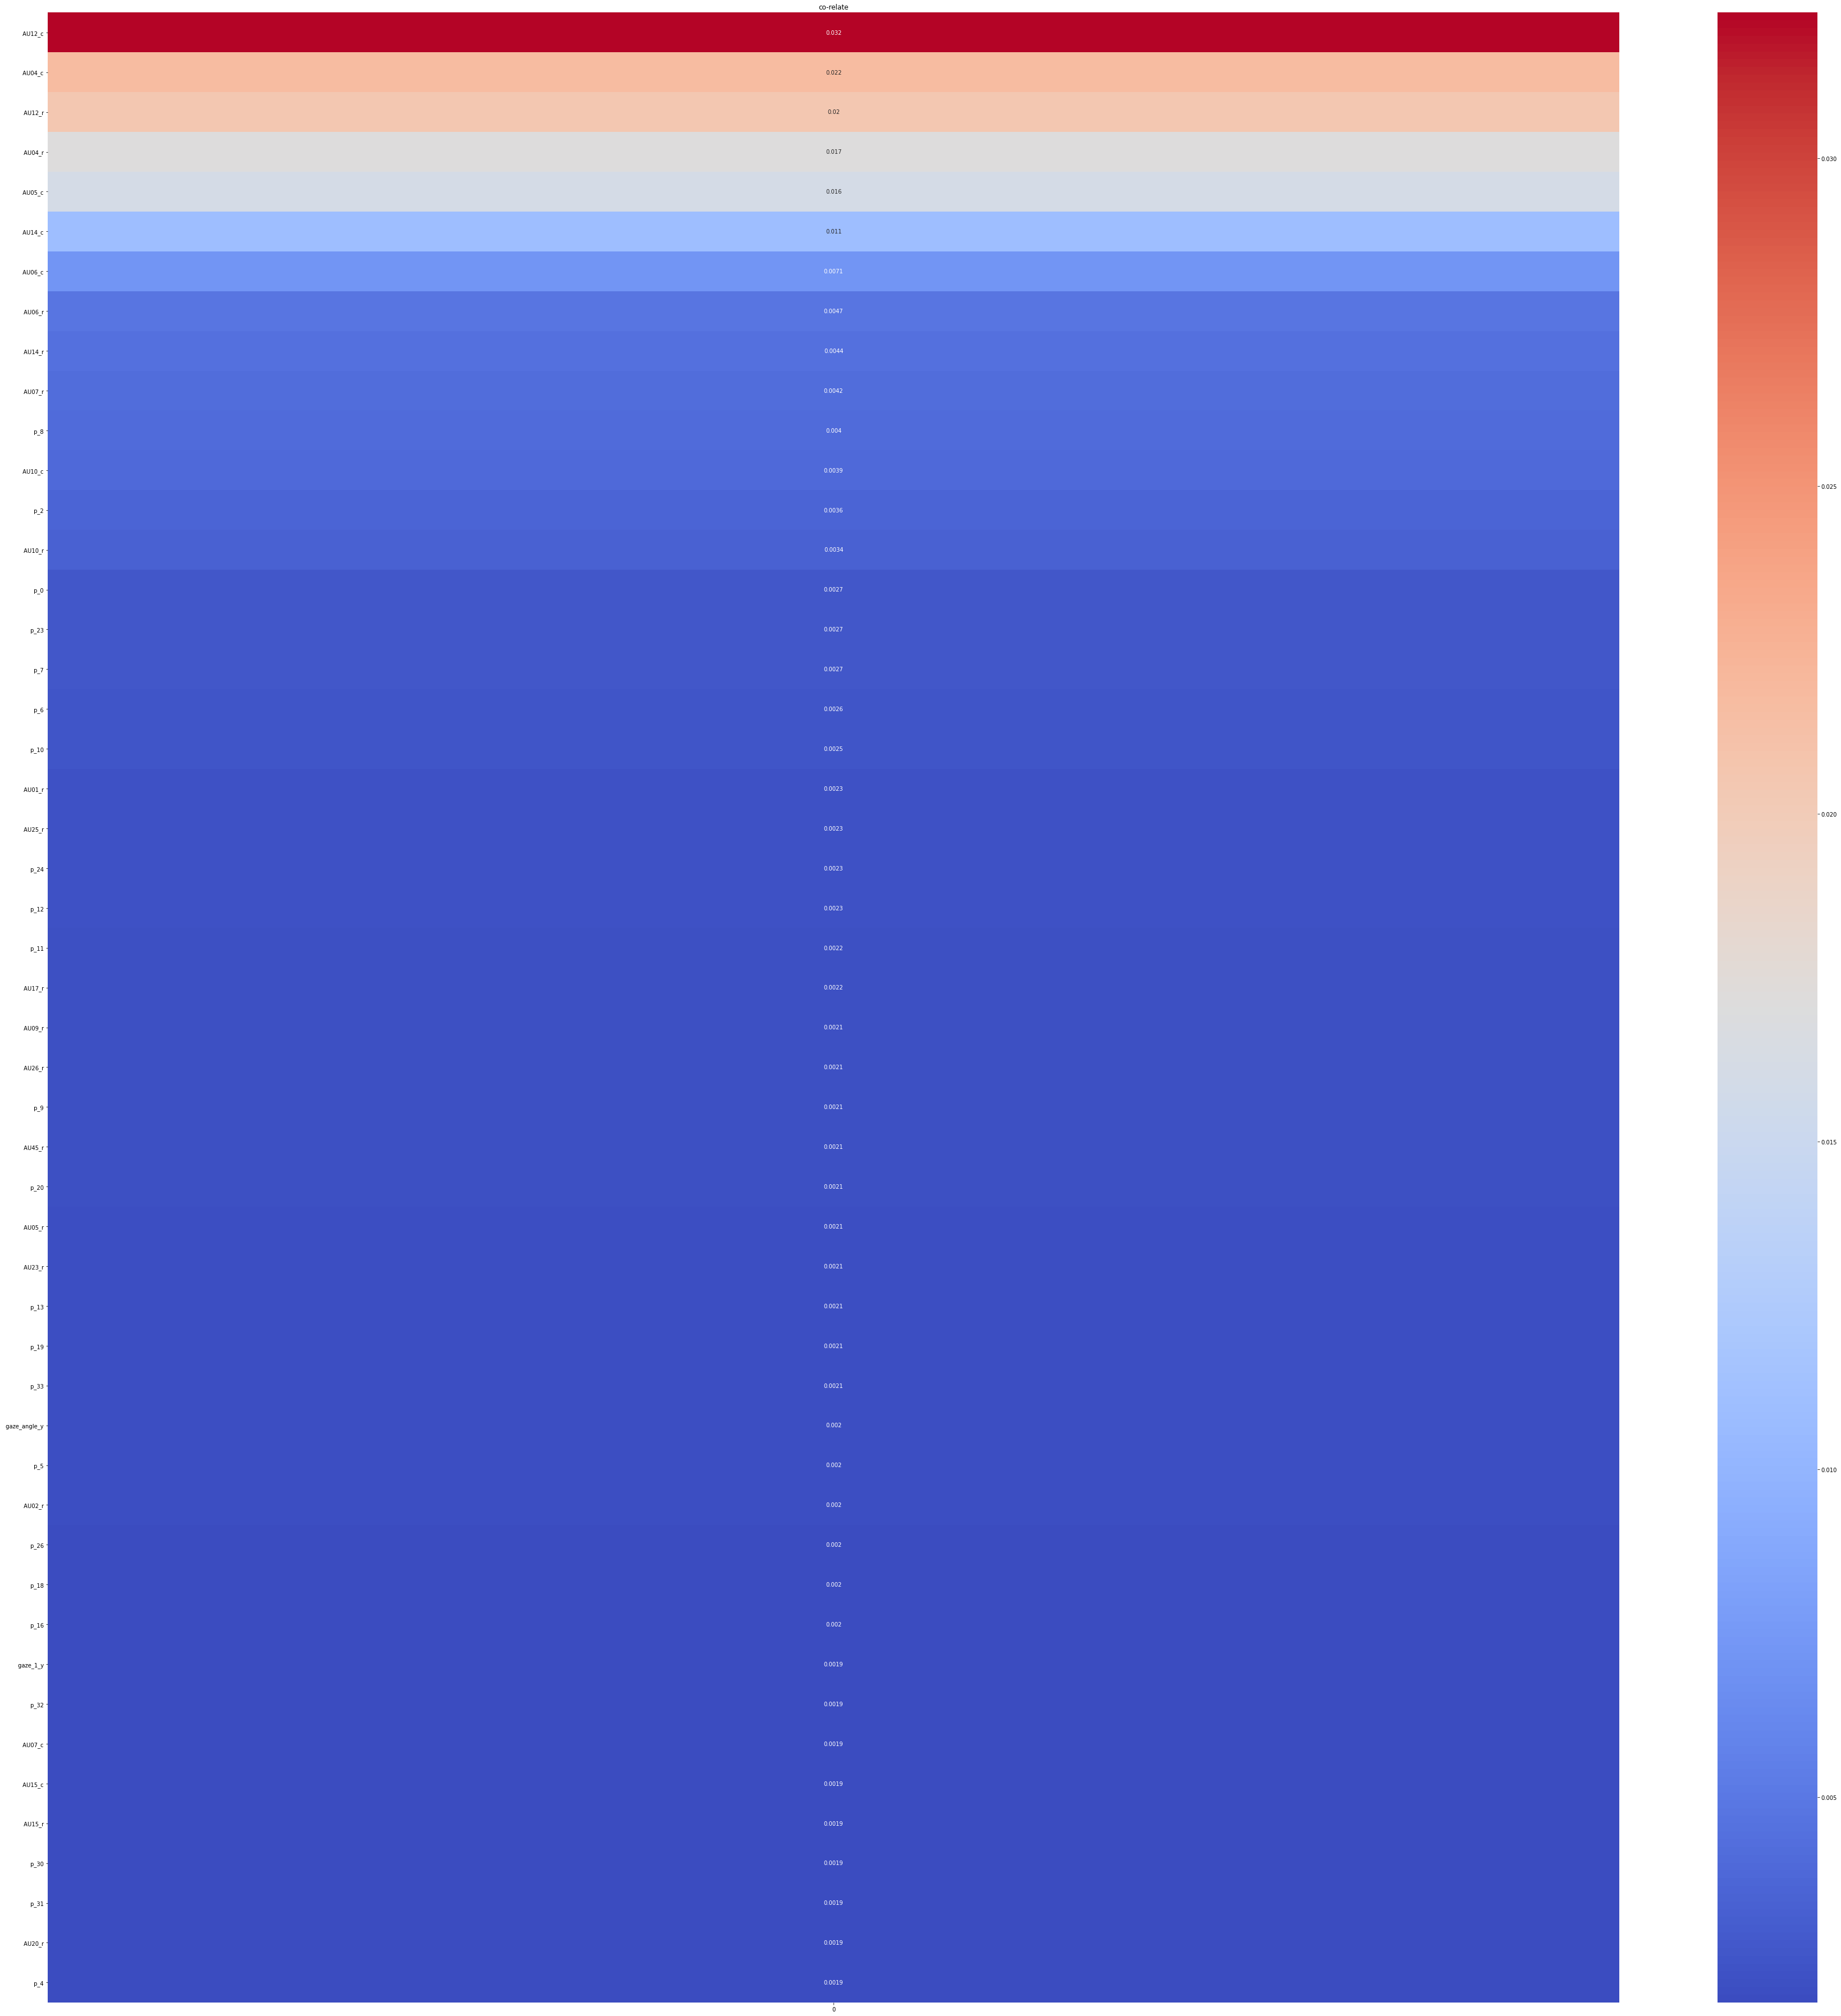

In [15]:
plt.figure(figsize=(50,50))

ax=sns.heatmap(h6, annot=True, cmap="coolwarm", yticklabels=helix['0']).set_title('co-relate')
plt.tight_layout()
plt.show()

<AxesSubplot:>

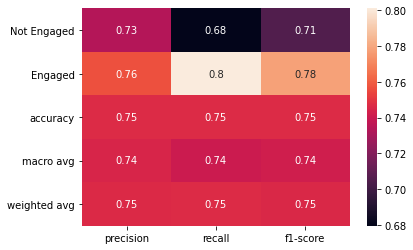

In [16]:
sns.heatmap(pd.DataFrame(claf_report).iloc[:-1, :].T, annot=True)

### Saving the Model

In [17]:
patho=r'./models'
joblib.dump(model, (os.path.join(patho,r''+'model_joblib_random_forest')))

['./models/model_joblib_random_forest']

In [18]:
plt.close()

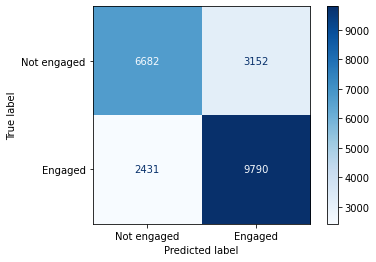

In [19]:
metrics.plot_confusion_matrix(model, x_train, y_train, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'])

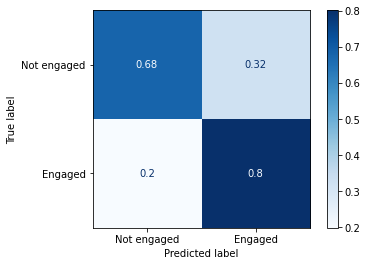

In [20]:
metrics.plot_confusion_matrix(model, x_train, y_train, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'], normalize='true')